Davis Southern Women Club Analysis:
https://networkx.github.io/documentation/networkx-1.10/examples/algorithms/davis_club.html

In [1]:
import networkx as nx
import networkx.algorithms.bipartite as bi
import matplotlib.pyplot as plt
%pylab inline
import numpy as np

Populating the interactive namespace from numpy and matplotlib


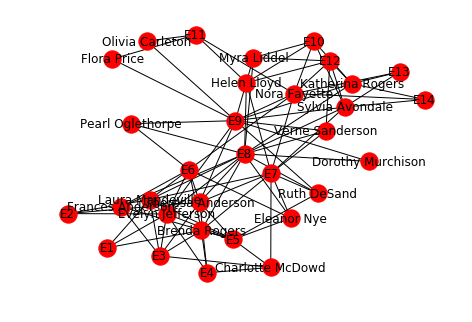

In [3]:
#Look at Women as the primary node
G = nx.davis_southern_women_graph()
women = G.graph['top']
clubs = G.graph['bottom']
nx.draw(G,with_labels=True)

In [4]:
G = nx.davis_southern_women_graph()
women = G.graph['top']
clubs = G.graph['bottom']

print("Biadjacency matrix")
print(bi.biadjacency_matrix(G,women,clubs))

# project bipartite graph onto women nodes
W = bi.projected_graph(G, women)
print('')
print("#Friends, Member")
for w in women:
    print('%d %s' % (W.degree(w),w))

# project bipartite graph onto women nodes keeping number of co-occurence
# the degree computed is weighted and counts the total number of shared contacts
W = bi.weighted_projected_graph(G, women, ratio=False)
print('')
print("#Friend meetings, Member")
for w in women:
    print('%d %s' % (W.degree(w,weight='weight'),w))

Biadjacency matrix
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	1
  (0, 4)	1
  (0, 5)	1
  (0, 7)	1
  (0, 8)	1
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 4)	1
  (1, 5)	1
  (1, 6)	1
  (1, 7)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	1
  (2, 4)	1
  (2, 5)	1
  (2, 6)	1
  (2, 7)	1
  (2, 8)	1
  (3, 0)	1
  (3, 2)	1
  :	:
  (12, 7)	1
  (12, 8)	1
  (12, 9)	1
  (12, 11)	1
  (12, 12)	1
  (12, 13)	1
  (13, 5)	1
  (13, 6)	1
  (13, 8)	1
  (13, 9)	1
  (13, 10)	1
  (13, 11)	1
  (13, 12)	1
  (13, 13)	1
  (14, 6)	1
  (14, 7)	1
  (14, 9)	1
  (14, 10)	1
  (14, 11)	1
  (15, 7)	1
  (15, 8)	1
  (16, 8)	1
  (16, 10)	1
  (17, 8)	1
  (17, 10)	1

#Friends, Member
17 Evelyn Jefferson
15 Laura Mandeville
17 Theresa Anderson
15 Brenda Rogers
11 Charlotte McDowd
15 Frances Anderson
15 Eleanor Nye
16 Pearl Oglethorpe
17 Ruth DeSand
17 Verne Sanderson
16 Myra Liddel
16 Katherina Rogers
17 Sylvia Avondale
17 Nora Fayette
17 Helen Lloyd
16 Dorothy Murchison
12 Olivia Carleton
12 Flora Price

#Friend meetings, Member
50 Evelyn Jefferson

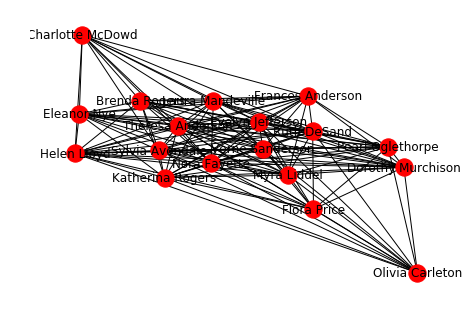

In [5]:
nx.draw(W,with_labels=True)

In [6]:
nx.degree(W)

{'Brenda Rogers': 15,
 'Charlotte McDowd': 11,
 'Dorothy Murchison': 16,
 'Eleanor Nye': 15,
 'Evelyn Jefferson': 17,
 'Flora Price': 12,
 'Frances Anderson': 15,
 'Helen Lloyd': 17,
 'Katherina Rogers': 16,
 'Laura Mandeville': 15,
 'Myra Liddel': 16,
 'Nora Fayette': 17,
 'Olivia Carleton': 12,
 'Pearl Oglethorpe': 16,
 'Ruth DeSand': 17,
 'Sylvia Avondale': 17,
 'Theresa Anderson': 17,
 'Verne Sanderson': 17}

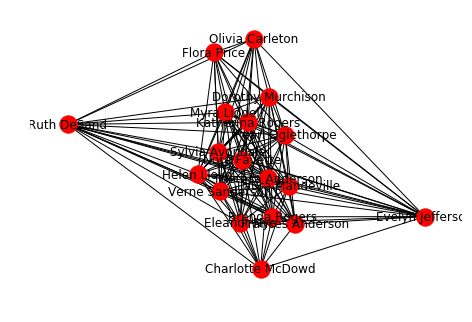

In [7]:
nx.draw(W,with_labels=True)

In [8]:
#number of edges
nx.number_of_edges(W)

139

In [9]:
dg = nx.degree_centrality(W)
dg_sorted = sorted(dg.iteritems(),key=lambda(k,v):(-v,k))
dg_sorted

[('Evelyn Jefferson', 1.0),
 ('Helen Lloyd', 1.0),
 ('Nora Fayette', 1.0),
 ('Ruth DeSand', 1.0),
 ('Sylvia Avondale', 1.0),
 ('Theresa Anderson', 1.0),
 ('Verne Sanderson', 1.0),
 ('Dorothy Murchison', 0.9411764705882353),
 ('Katherina Rogers', 0.9411764705882353),
 ('Myra Liddel', 0.9411764705882353),
 ('Pearl Oglethorpe', 0.9411764705882353),
 ('Brenda Rogers', 0.8823529411764706),
 ('Eleanor Nye', 0.8823529411764706),
 ('Frances Anderson', 0.8823529411764706),
 ('Laura Mandeville', 0.8823529411764706),
 ('Flora Price', 0.7058823529411764),
 ('Olivia Carleton', 0.7058823529411764),
 ('Charlotte McDowd', 0.6470588235294118)]

In [10]:
eg = nx.eigenvector_centrality(W)
eg_sorted = sorted(eg.iteritems(),key=lambda(k,v):(-v,k))
eg_sorted

[('Theresa Anderson', 0.3535543079787813),
 ('Evelyn Jefferson', 0.31851939808941326),
 ('Brenda Rogers', 0.3042441458828134),
 ('Laura Mandeville', 0.3004071023132385),
 ('Sylvia Avondale', 0.27287816402411424),
 ('Nora Fayette', 0.25327409433896136),
 ('Ruth DeSand', 0.24851046730154439),
 ('Eleanor Nye', 0.23903727426379084),
 ('Verne Sanderson', 0.23070022516533012),
 ('Katherina Rogers', 0.22197541991016084),
 ('Frances Anderson', 0.21795620141635108),
 ('Helen Lloyd', 0.20694099815460332),
 ('Myra Liddel', 0.19772737738736912),
 ('Pearl Oglethorpe', 0.19401096912533003),
 ('Charlotte McDowd', 0.17419271498707897),
 ('Dorothy Murchison', 0.14601319874928245),
 ('Flora Price', 0.07747514231744787),
 ('Olivia Carleton', 0.07747514231744787)]

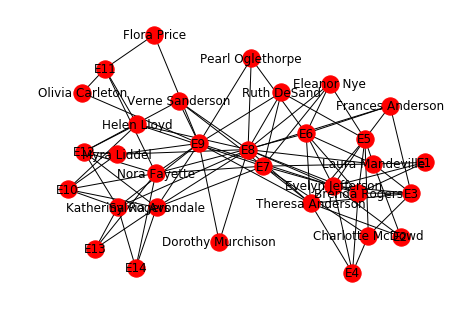

In [11]:
#Look at Events as the primary node
GG = nx.davis_southern_women_graph()
women = GG.graph['bottom']
clubs = GG.graph['top']

nx.draw(GG,with_labels=True)

In [12]:
# project bipartite graph onto women nodes
E = bi.projected_graph(GG, women)
print('')
print("#Friends, Member")
for w in women:
    print('%d %s' % (E.degree(w),w))

# project bipartite graph onto women nodes keeping number of co-occurence
# the degree computed is weighted and counts the total number of shared contacts
E = bi.weighted_projected_graph(GG, women, ratio=False)
print('')
print("#Friend meetings, Member")
for w in women:
    print('%d %s' % (E.degree(w,weight='weight'),w))



#Friends, Member
8 E1
8 E2
8 E3
8 E4
8 E5
13 E6
13 E7
13 E8
13 E9
8 E10
8 E11
8 E12
8 E13
8 E14

#Friend meetings, Member
19 E1
20 E2
32 E3
23 E4
38 E5
41 E6
48 E7
59 E8
46 E9
25 E10
13 E11
28 E12
18 E13
18 E14


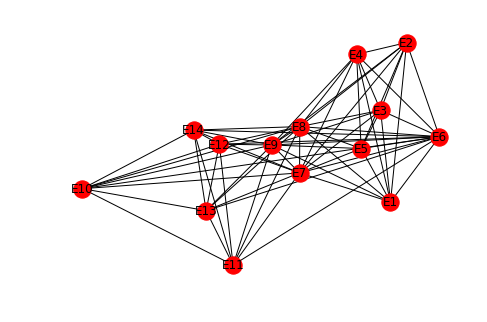

In [13]:
nx.draw(E,with_labels=True)

In [14]:
#number of edges
nx.number_of_edges(W)

139

In [15]:
#number of edges
nx.number_of_edges(E)

66

In [16]:
dg = nx.degree_centrality(E)
dg_sorted = sorted(dg.iteritems(),key=lambda(k,v):(-v,k))
dg_sorted

[('E6', 1.0),
 ('E7', 1.0),
 ('E8', 1.0),
 ('E9', 1.0),
 ('E1', 0.6153846153846154),
 ('E10', 0.6153846153846154),
 ('E11', 0.6153846153846154),
 ('E12', 0.6153846153846154),
 ('E13', 0.6153846153846154),
 ('E14', 0.6153846153846154),
 ('E2', 0.6153846153846154),
 ('E3', 0.6153846153846154),
 ('E4', 0.6153846153846154),
 ('E5', 0.6153846153846154)]

In [17]:
eg = nx.eigenvector_centrality(E)
eg_sorted = sorted(eg.iteritems(),key=lambda(k,v):(-v,k))
eg_sorted

[('E8', 0.45264191380914165),
 ('E7', 0.376991633336911),
 ('E9', 0.35167660565277215),
 ('E6', 0.3388942077425401),
 ('E5', 0.33267858562634894),
 ('E3', 0.276932473542198),
 ('E12', 0.21562960406303436),
 ('E4', 0.20295471199819207),
 ('E10', 0.1869239265282631),
 ('E2', 0.17709528818894787),
 ('E1', 0.16787762658721364),
 ('E13', 0.1315840390605596),
 ('E14', 0.1315840390605596),
 ('E11', 0.10148200903638323)]

It looks like the Davis Southern Woman club is a pretty tight network and centralized.  Most of the woman or members do not attend all of the events.